# CNN Results Exploration

## Training History

### Import 

In [1]:
import pandas as pd

# Load the CSV file 
file_path_EN = "../models/CNN_EfficientNet/checkpoints/training_history.csv"  
df_Efficient_Training = pd.read_csv(file_path_EN)

file_path_VGG = "../models/CNN_VGG/checkpoints/training_history.csv"  
df_VGG_Training = pd.read_csv(file_path_VGG)

file_path_RN = "../models/CNN_ResNet/checkpoints/training_history.csv"  
df_ResNet_Training = pd.read_csv(file_path_RN)

file_path_B = "../models/cnn_ryan/checkpoints/training_history.csv"  
df_bespoke_Training = pd.read_csv(file_path_B)


#### Exploration

#### Individual Line Plots for Accuracy and Loss

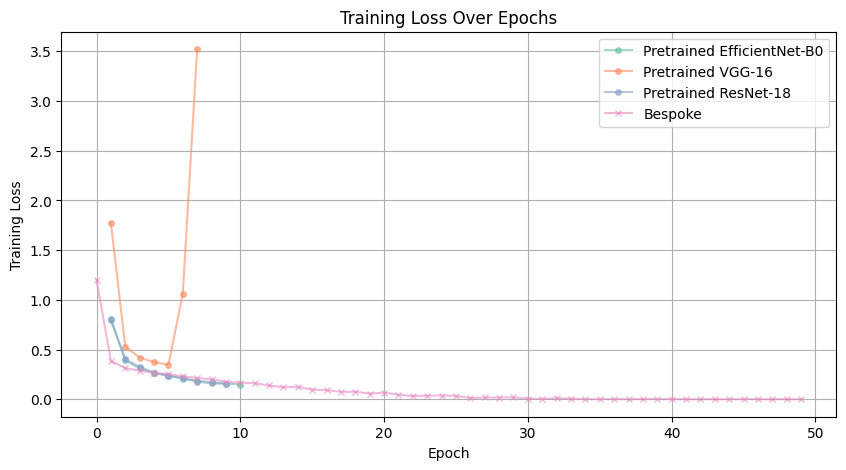

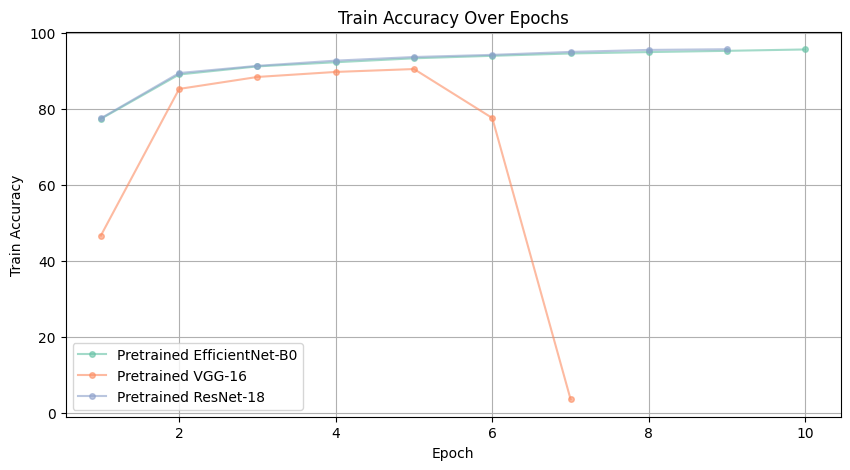

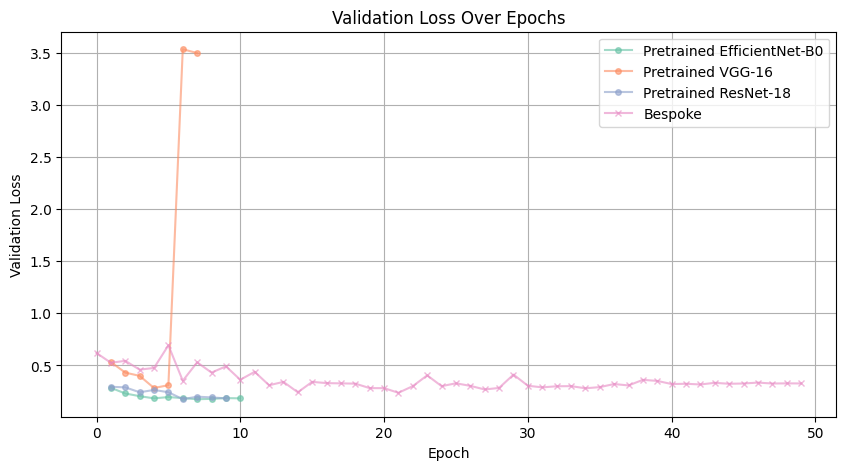

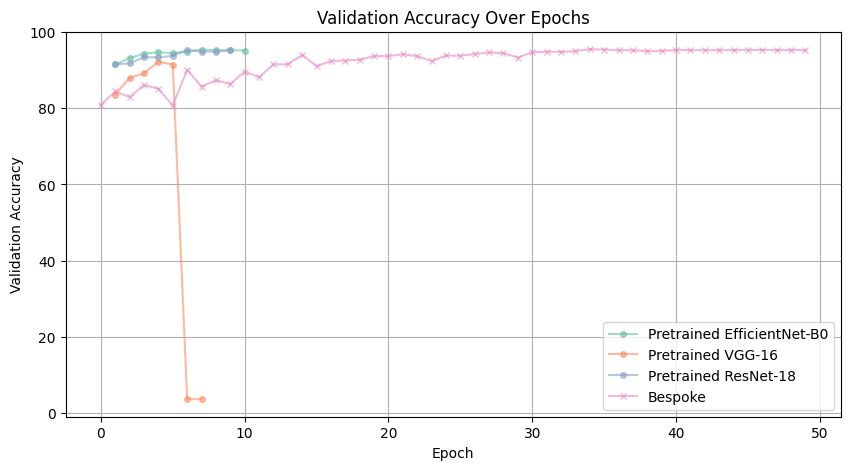

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns_colors = sns.color_palette("Set2", 5)
#colors = plt.get_cmap("viridis")(np.linspace(0, 1, 2)) 

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="o", markersize=2, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Accuracy"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()


#### Summary Plots 

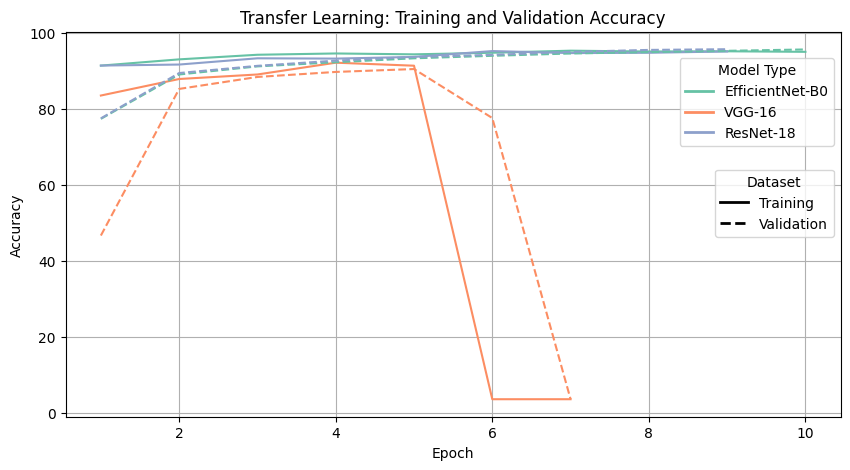

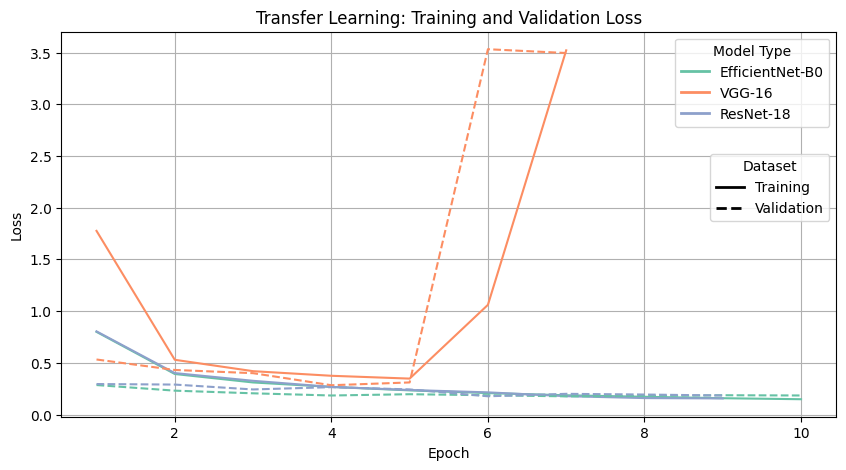

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

sns_colors = sns.color_palette("Set2", 4)

# Create legends
legend_models = [
    mlines.Line2D([], [], color=sns_colors[0], linewidth=2, label="EfficientNet-B0"),
    mlines.Line2D([], [], color=sns_colors[1], linewidth=2, label="VGG-16"),
    mlines.Line2D([], [], color=sns_colors[2], linewidth=2, label="ResNet-18"),
    #mlines.Line2D([], [], color=sns_colors[3], linewidth=2, label="Bespoke"),
]

legend_lines = [
    mlines.Line2D([], [], color="black", linewidth=2, linestyle="-", label="Training"),
    mlines.Line2D([], [], color="black", linewidth=2, linestyle="dashed", label="Validation"),
]

## Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Accuracy"], color=sns_colors[0], label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Accuracy"], color=sns_colors[1], label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Accuracy"], color=sns_colors[2], label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Accuracy"], color=sns_colors[3], label="_nolegend_")
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Accuracy"], color=sns_colors[0], linestyle='dashed', label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Accuracy"], color=sns_colors[1], linestyle='dashed', label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Accuracy"], color=sns_colors[2], linestyle='dashed', label="_nolegend_")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Transfer Learning: Training and Validation Accuracy")
plt.grid()

legend1 = plt.legend(handles=legend_models, loc="upper right", title="Model Type", bbox_to_anchor=(1, 0.95))
legend2 = plt.legend(handles=legend_lines, loc="upper right", title="Dataset", bbox_to_anchor=(1, 0.66))
plt.gca().add_artist(legend1) 
plt.show()

## Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Loss"], color=sns_colors[0], label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Loss"], color=sns_colors[1], label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Loss"], color=sns_colors[2], label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], color=sns_colors[3], label="_nolegend_")
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Loss"], color=sns_colors[0], linestyle='dashed', label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Loss"], color=sns_colors[1], linestyle='dashed', label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Loss"], color=sns_colors[2], linestyle='dashed', label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Loss"], color=sns_colors[3], linestyle='dashed', label="_nolegend_")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Transfer Learning: Training and Validation Loss")
plt.grid()

legend1 = plt.legend(handles=legend_models, loc="upper right", title="Model Type", bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=legend_lines, loc="upper right", title="Dataset", bbox_to_anchor=(1, 0.7))
plt.gca().add_artist(legend1)  
plt.show()



## Test Results

#### Import

In [4]:
# Define file path
EF_RESULTS_PATH = "../models/CNN_EfficientNet/results/test_results.txt"
EF_CONF_MATRIX_PATH = "../models/CNN_EfficientNet/results/confusion_matrix.csv"

VGG_RESULTS_PATH = "../models/CNN_VGG/results/test_results.txt"
VGG_CONF_MATRIX_PATH = "../models/CNN_VGG/results/confusion_matrix.csv"

RN_RESULTS_PATH = "../models/CNN_ResNet/results/test_results.txt"
RN_CONF_MATRIX_PATH = "../models/CNN_ResNet/results/confusion_matrix.csv"

### Classification Report
Precision, Recall & F1-Score

#### Import

In [5]:
import pandas as pd
import re
import os

# Parse test results txt file 
# Returns a DataFrame containing class-wise precision, recall, f1-score, and support.
def parse_classification_report(results_path):

    # Check if file exists
    if not os.path.exists(results_path):
        print(f"Error: File not found at {results_path}")
        return None

    # Read the test results file
    with open(results_path, "r") as f:
        test_results = f.readlines() 

    # Find where the classification report starts
    try:
        start_idx = next(i for i, line in enumerate(test_results) if "Classification Report:" in line) + 2
        end_idx = next(i for i, line in enumerate(test_results) if "Confusion Matrix" in line)
    except StopIteration:
        print(f"Error: Could not find classification report in {results_path}")
        return None

    # Extract classification report lines
    report_lines = test_results[start_idx:end_idx]

    # Clean up empty lines and strip whitespace
    report_lines = [line.strip() for line in report_lines if line.strip()]

    # Define expected columns
    columns = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    report_data = []

    # Process each line carefully
    for line in report_lines:
        parts = re.split(r'\s+', line.strip())

        # Handle special cases like "accuracy" that have fewer columns
        if len(parts) == 2:
            parts.insert(1, '') 
            parts.insert(2, '')
            parts.insert(3, '')

        # Ensure all rows have 5 columns
        if len(parts) == 5:
            report_data.append(parts)
        else:
            print(f"Skipping malformed row: {parts}") 

    # Convert into DataFrame
    df_report = pd.DataFrame(report_data, columns=columns)
    df_report.set_index("Class", inplace=True)  # Set class names as index

    # Convert numerical columns to float (except "Support", which is integer)
    for col in ["Precision", "Recall", "F1-Score"]:
        df_report[col] = pd.to_numeric(df_report[col], errors="coerce")

    df_report["Support"] = pd.to_numeric(df_report["Support"], errors="coerce", downcast="integer")

    return df_report


In [6]:
test_results_EF = parse_classification_report(EF_RESULTS_PATH)
test_results_VGG = parse_classification_report(VGG_RESULTS_PATH)
test_results_RN = parse_classification_report(RN_RESULTS_PATH)

# fix index issue
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})

Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.94', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']
Skipping malformed row: ['accuracy', '0.91', '11005']
Skipping malformed row: ['macro', 'avg', '0.91', '0.90', '0.91', '11005']
Skipping malformed row: ['weighted', 'avg', '0.92', '0.91', '0.91', '11005']
Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.95', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']


In [7]:
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})
print(test_results_EF.index)
print(test_results_VGG.index)
print(test_results_RN.index)

RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine all models into one DataFrame for easier visualization
test_results_EF["Model"] = "EfficientNet"
test_results_VGG["Model"] = "VGG16"
test_results_RN["Model"] = "ResNet18"

df_all_models = pd.concat([test_results_EF, test_results_VGG, test_results_RN], ignore_index=True)
#df_melted = df_all_models.melt(id_vars=["Class", "Model"], value_vars=["Precision", "Recall", "F1-Score"])

Bar Chart Comparison 

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)


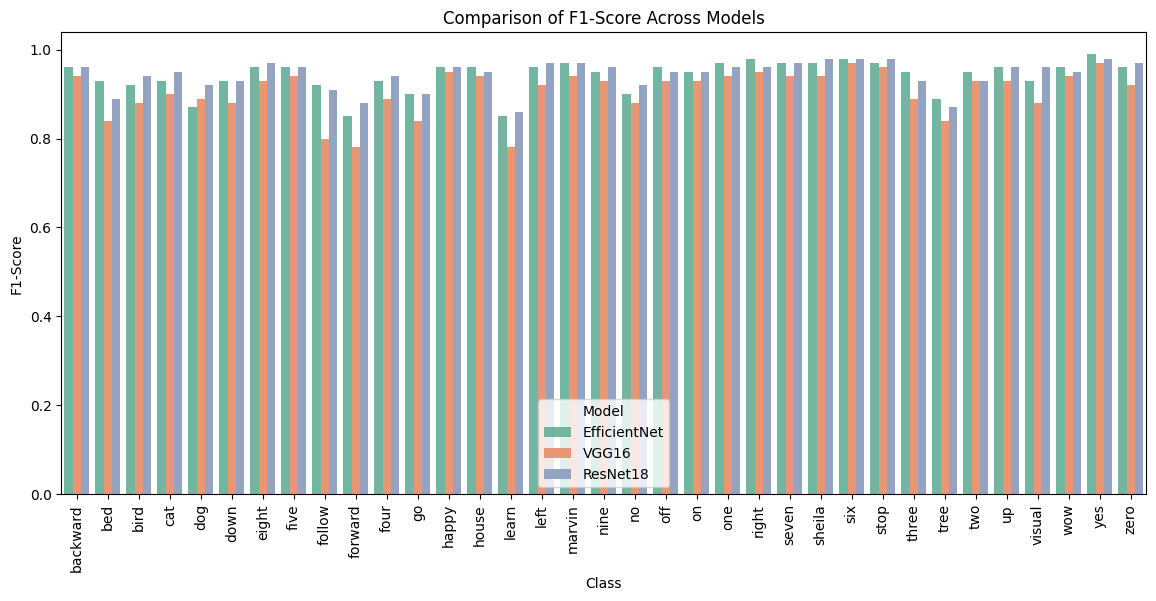

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)


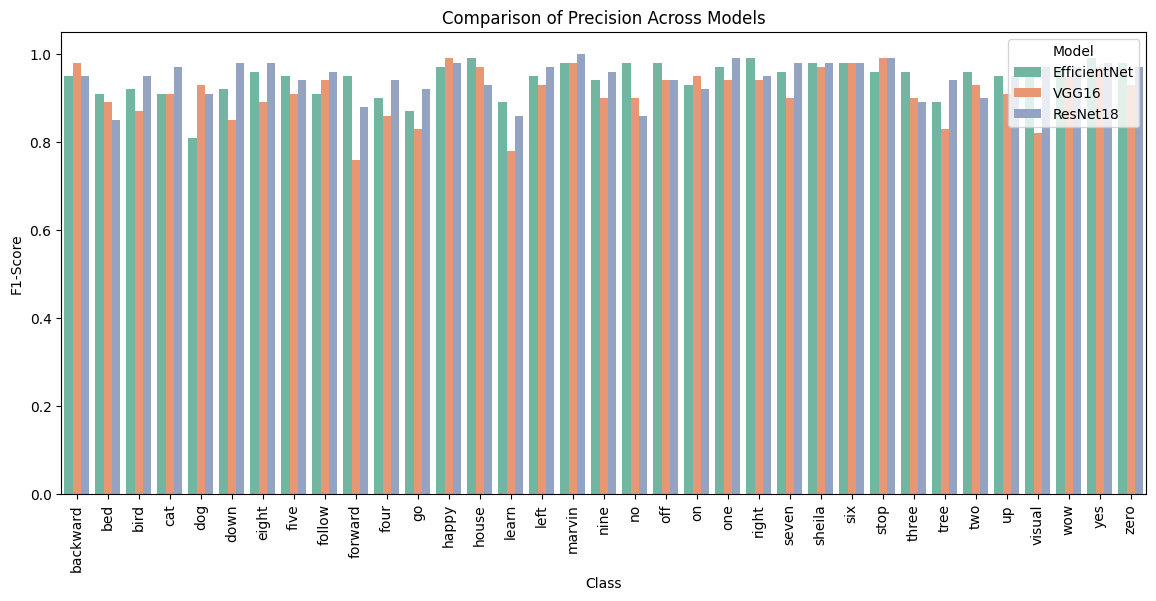

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)


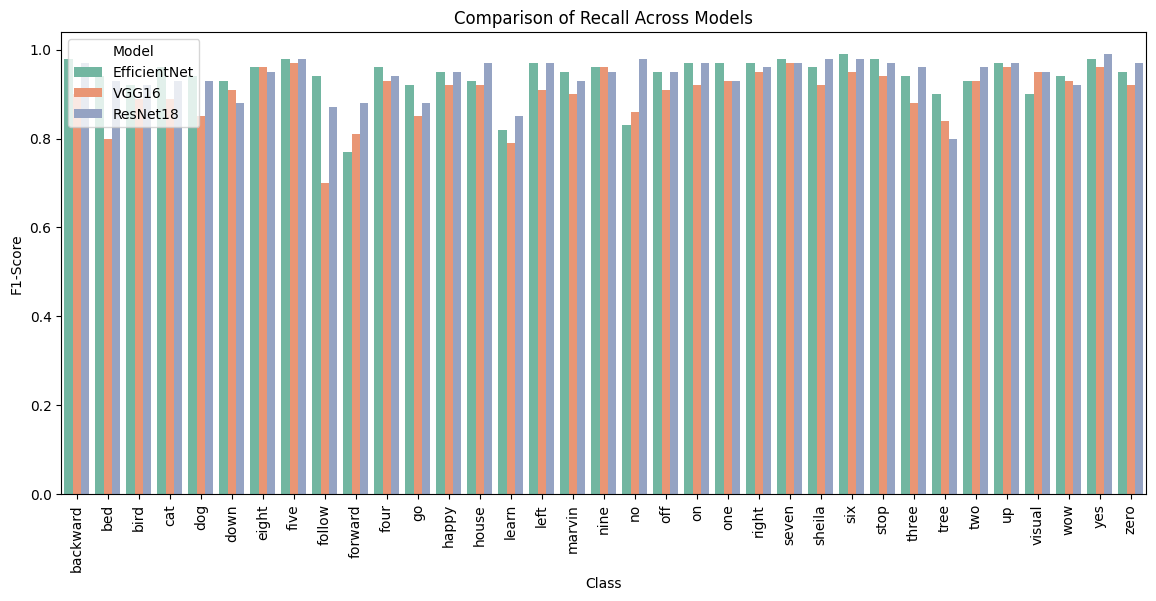

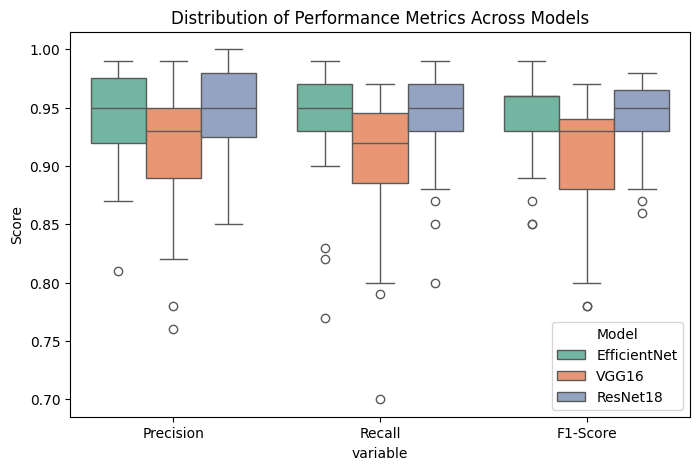

In [ ]:
sns.set_palette("Set2")

# Bar plot comparing performance metrics per class across models
plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of F1-Score Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Precision Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Recall Across Models")
plt.legend(title="Model")
plt.show()


# Box plot to compare the overall distribution of Precision, Recall, and F1-score across models
plt.figure(figsize=(8, 5))
sns.boxplot(x="variable", y="value", hue="Model", data=df_melted)
plt.ylabel("Score")
plt.title("Distribution of Performance Metrics Across Models")
plt.show()

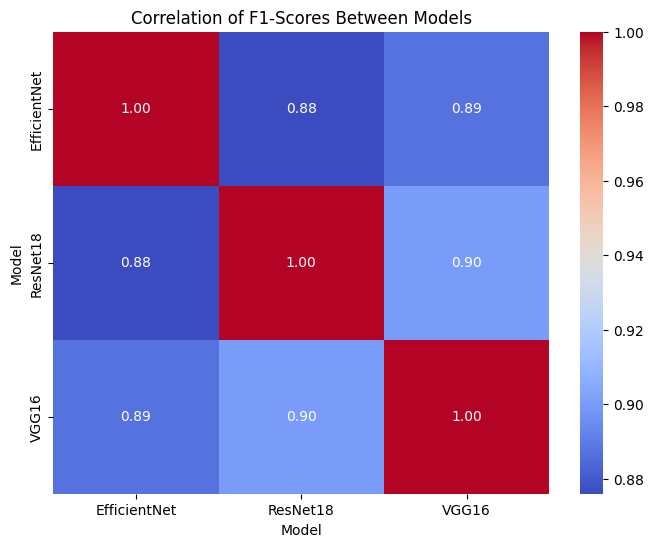

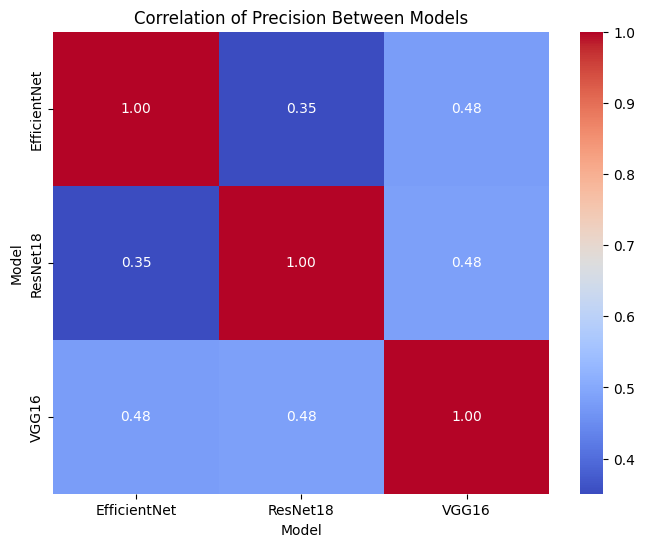

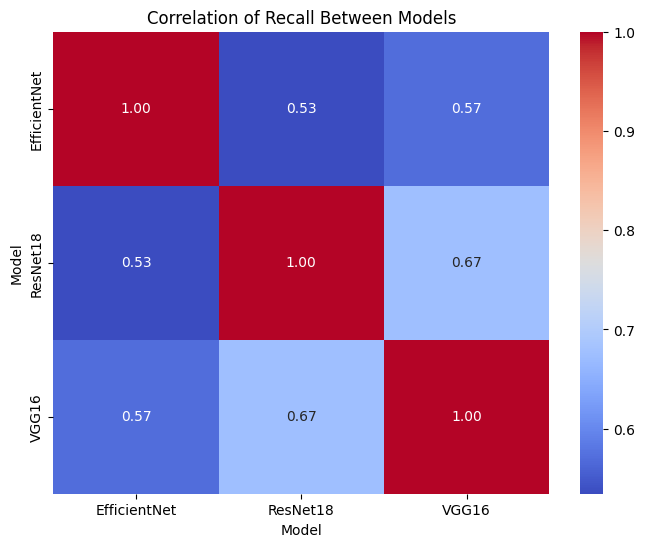

In [ ]:
# Heatmap to show correlation between models
df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="F1-Score")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of F1-Scores Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Precision")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Precision Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Recall")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Recall Between Models")
plt.show()



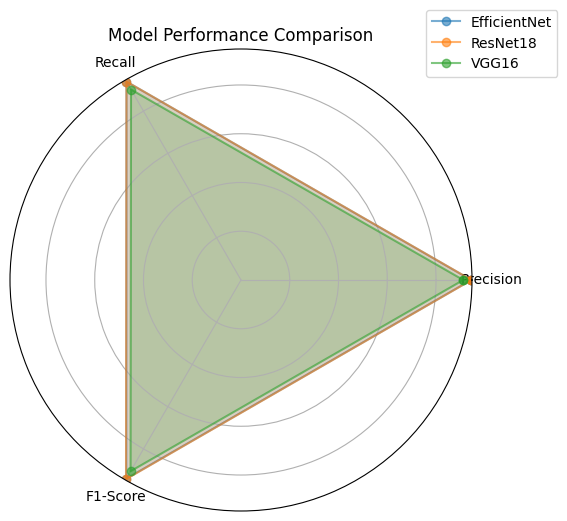

In [12]:
# Radar chart (Spider plot) for overall performance comparison

# Compute average scores per model
df_avg = df_all_models.groupby("Model")[["Precision", "Recall", "F1-Score"]].mean()

labels = df_avg.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model, row in df_avg.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, marker="o", alpha=0.6)
    ax.fill(angles, values, alpha=0.2)

# Format radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Performance Comparison")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()

### Confusion Matrix 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load confusion matrix from CSV
def load_confusion_matrix(file_path):
    df = pd.read_csv(file_path, index_col=0)  # First column is class labels
    class_labels = df.index.tolist()  # Extract class labels
    conf_matrix = df.to_numpy()  # Convert to NumPy array
    return conf_matrix, class_labels

# Load confusion matrices from three models
conf_matrix_EF, class_labels_EF = load_confusion_matrix(EF_CONF_MATRIX_PATH)
conf_matrix_VGG, class_labels_VGG = load_confusion_matrix(VGG_CONF_MATRIX_PATH)
conf_matrix_RN, class_labels_RN = load_confusion_matrix(RN_CONF_MATRIX_PATH)

#### Most Commonly Confused Words per Model

In [ ]:
# Find the most commonly confused words
def get_most_confused_words(conf_matrix, class_labels, top_n=3):
    confused_words = {}
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0  
        most_confused = np.argsort(row)[::-1][:top_n]  
        confused_words[label] = [(class_labels[idx], row[idx]) for idx in most_confused if row[idx] > 0]
    return confused_words

# Convert to DataFrame 
def convert_to_dataframe(most_confused, model_name):
    return pd.DataFrame([(word, confused[0], confused[1], model_name) 
                         for word, confused_list in most_confused.items() 
                         for confused in confused_list],
                         columns=["True Label", "Predicted Label", "Confusion Count", "Model"])


# Get the most confused words for each model
most_confused_EF = get_most_confused_words(conf_matrix_EF, class_labels_EF)
most_confused_VGG = get_most_confused_words(conf_matrix_VGG, class_labels_VGG)
most_confused_RN = get_most_confused_words(conf_matrix_RN, class_labels_RN)

df_confused_EF = convert_to_dataframe(most_confused_EF, "EfficientNet")
df_confused_VGG = convert_to_dataframe(most_confused_VGG, "VGG16")
df_confused_RN = convert_to_dataframe(most_confused_RN, "ResNet18")

df_confused_all = pd.concat([df_confused_EF, df_confused_VGG, df_confused_RN], ignore_index=True)


In [ ]:
print(df_confused_all)

    True Label Predicted Label  Confusion Count         Model
0     backward            nine                1  EfficientNet
1     backward             bed                1  EfficientNet
2     backward            four                1  EfficientNet
3          bed        backward                3  EfficientNet
4          bed             cat                1  EfficientNet
..         ...             ...              ...           ...
307        yes             cat                1      ResNet18
308        yes           eight                1      ResNet18
309       zero          sheila                4      ResNet18
310       zero             two                4      ResNet18
311       zero          visual                2      ResNet18

[312 rows x 4 columns]


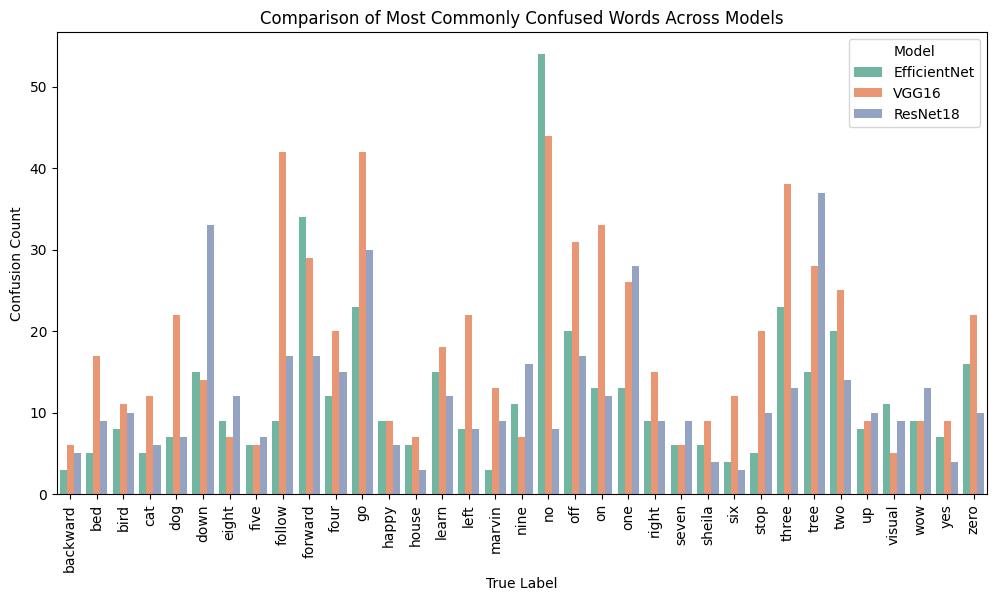

In [ ]:
# Visualization - Comparing Misclassifications
sns.set_palette("Set2")
plt.figure(figsize=(12, 6))
#sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all)
sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all, dodge=True, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Confusion Count")
plt.title("Comparison of Most Commonly Confused Words Across Models")
plt.legend(title="Model")
plt.show()

Normalized Confusion Matrix

In [ ]:
# Normalize confusion matrix
def normalize_conf_matrix(conf_matrix):
    return conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Normalize confusion matrices
conf_matrix_EF_norm = normalize_conf_matrix(conf_matrix_EF)
conf_matrix_VGG_norm = normalize_conf_matrix(conf_matrix_VGG)
conf_matrix_RN_norm = normalize_conf_matrix(conf_matrix_RN)

# Get the most confused words for each model
most_confused_EF = get_most_confused_words(conf_matrix_EF_norm, class_labels_EF)
most_confused_VGG = get_most_confused_words(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_RN = get_most_confused_words(conf_matrix_RN_norm, class_labels_RN)

#Conver to dataframe
df_confused_EF = convert_to_dataframe(most_confused_EF, "EfficientNet")
df_confused_VGG = convert_to_dataframe(most_confused_VGG, "VGG16")
df_confused_RN = convert_to_dataframe(most_confused_RN, "ResNet18")

df_confused_all = pd.concat([df_confused_EF, df_confused_VGG, df_confused_RN], ignore_index=True)

In [ ]:
df_confused_all

,True Label,Predicted Label,Confusion Count,Model
0,backward,nine,0.006061,EfficientNet
1,backward,bed,0.006061,EfficientNet
2,backward,four,0.006061,EfficientNet
3,bed,backward,0.014493,EfficientNet
4,bed,cat,0.004831,EfficientNet
...,...,...,...,...
307,yes,cat,0.002387,ResNet18
308,yes,eight,0.002387,ResNet18
309,zero,sheila,0.009569,ResNet18
310,zero,two,0.009569,ResNet18


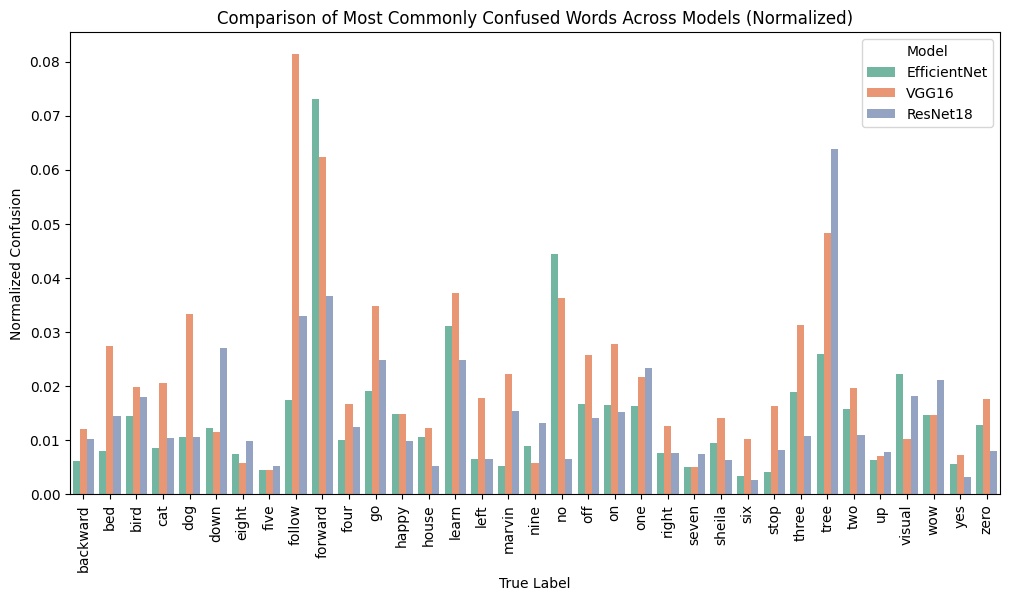

In [ ]:
# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Words Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

#### Commonly Confused Pairs

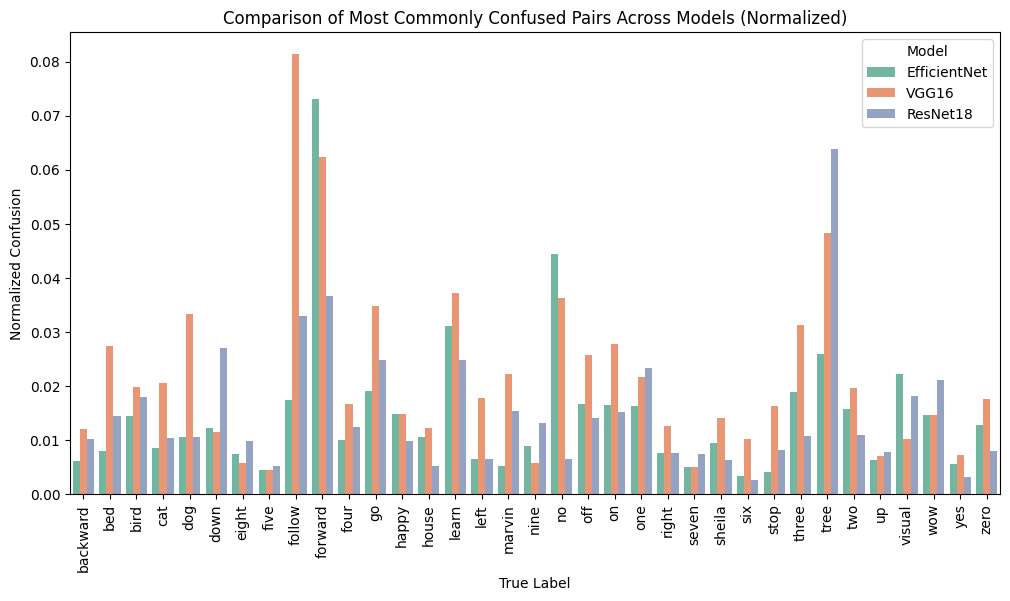

In [ ]:
# most commonly confused pairs
def get_most_confused_pairs(conf_matrix, class_labels, top_n=3):
    confused_pairs = []
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0  # Ignore correct classifications
        most_confused = np.argsort(row)[::-1][:top_n]  # Get top misclassified indices
        for idx in most_confused:
            if row[idx] > 0:
                confused_pairs.append((label, class_labels[idx], row[idx]))
    return confused_pairs

# Get the most confused pairs
most_confused_pairs_EF = get_most_confused_pairs(conf_matrix_EF_norm, class_labels_EF)
most_confused_pairs_VGG = get_most_confused_pairs(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_pairs_RN = get_most_confused_pairs(conf_matrix_RN_norm, class_labels_RN)

# Convert to DataFrame 
df_confused_pairs_EF = pd.DataFrame(most_confused_pairs_EF, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_EF["Model"] = "EfficientNet"

df_confused_pairs_VGG = pd.DataFrame(most_confused_pairs_VGG, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_VGG["Model"] = "VGG16"

df_confused_pairs_RN = pd.DataFrame(most_confused_pairs_RN, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_RN["Model"] = "ResNet18"

df_confused_pairs_all = pd.concat([df_confused_pairs_EF, df_confused_pairs_VGG, df_confused_pairs_RN], ignore_index=True)

df_confused_pairs_all

# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=df_confused_pairs_all, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Pairs Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

In [ ]:
df_confused_pairs_all

,True Label,Predicted Label,Normalized Confusion,Model
0,backward,nine,0.006061,EfficientNet
1,backward,bed,0.006061,EfficientNet
2,backward,four,0.006061,EfficientNet
3,bed,backward,0.014493,EfficientNet
4,bed,cat,0.004831,EfficientNet
...,...,...,...,...
307,yes,cat,0.002387,ResNet18
308,yes,eight,0.002387,ResNet18
309,zero,sheila,0.009569,ResNet18
310,zero,two,0.009569,ResNet18


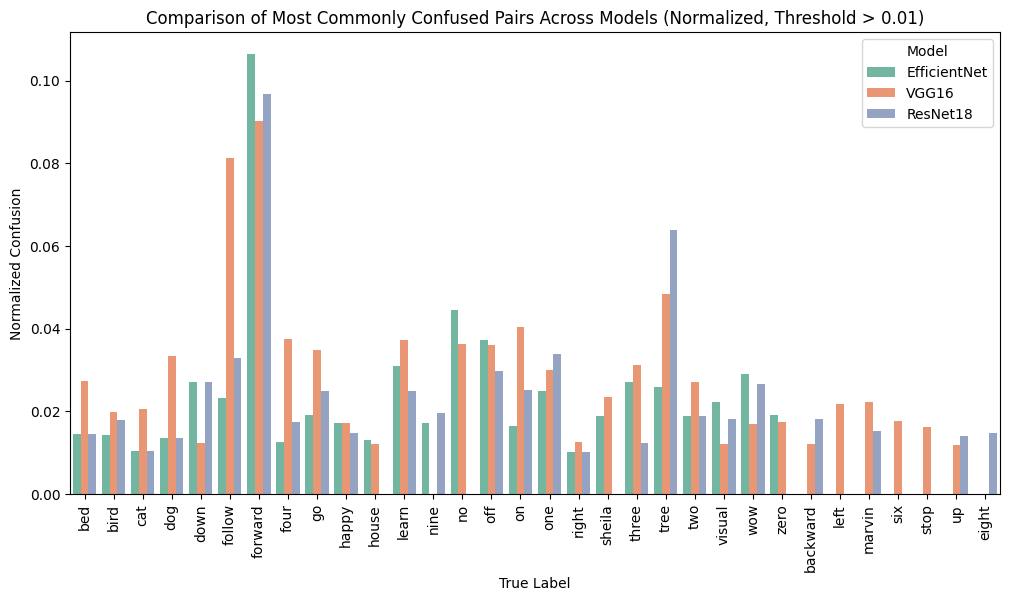

In [ ]:

# Filter for confusion values greater than 0.01
filtered_df_confused_pairs = df_confused_pairs_all[df_confused_pairs_all["Normalized Confusion"] > 0.01]

# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=filtered_df_confused_pairs, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Pairs Across Models (Normalized, Threshold > 0.01)")
plt.legend(title="Model")
plt.show()

In [ ]:
filtered_df_confused_pairs

,True Label,Predicted Label,Normalized Confusion,Model
3,bed,backward,0.014493,EfficientNet
6,bird,bed,0.016216,EfficientNet
7,bird,five,0.016216,EfficientNet
8,bird,backward,0.010811,EfficientNet
9,cat,up,0.010309,EfficientNet
...,...,...,...,...
300,visual,zero,0.030303,ResNet18
301,visual,bed,0.012121,ResNet18
302,visual,eight,0.012121,ResNet18
303,wow,no,0.038835,ResNet18


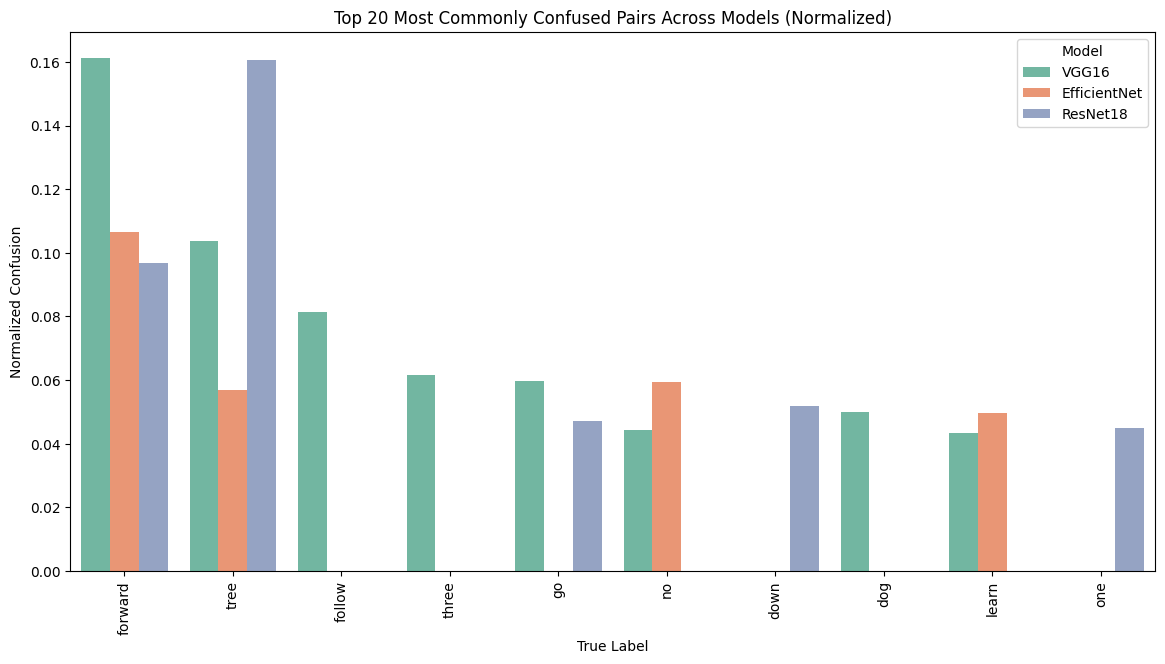

In [ ]:
# Get the top 20 most confused pairs
top_20_confused_pairs = df_confused_pairs_all.sort_values("Normalized Confusion", ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=top_20_confused_pairs, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Top 20 Most Commonly Confused Pairs Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

### Top 20 Most Commonly Confused Pairs

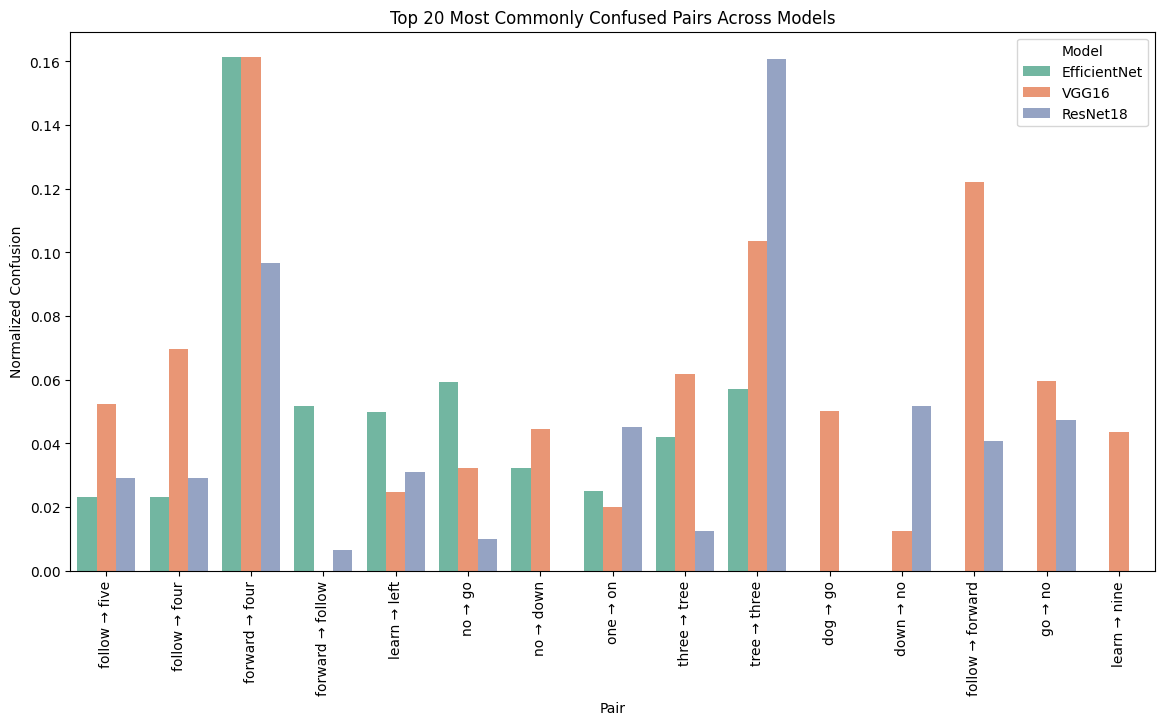

In [ ]:
# most commonly confused pairs
def get_most_confused_pairs(conf_matrix, class_labels, top_n=3):
    confused_pairs = []
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0 
        most_confused = np.argsort(row)[::-1][:top_n] 
        for idx in most_confused:
            if row[idx] > 0:
                confused_pairs.append((label, class_labels[idx], row[idx]))
    return confused_pairs

# most confused pairs 
most_confused_pairs_EF = get_most_confused_pairs(conf_matrix_EF_norm, class_labels_EF)
most_confused_pairs_VGG = get_most_confused_pairs(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_pairs_RN = get_most_confused_pairs(conf_matrix_RN_norm, class_labels_RN)

# Convert to DataFrame 
def convert_to_dataframe(most_confused_pairs, model_name):
    df = pd.DataFrame(most_confused_pairs, columns=["True Label", "Predicted Label", "Normalized Confusion"])
    df["Model"] = model_name
    df["Pair"] = df["True Label"] + " → " + df["Predicted Label"]
    return df

df_confused_pairs_EF = convert_to_dataframe(most_confused_pairs_EF, "EfficientNet")
df_confused_pairs_VGG = convert_to_dataframe(most_confused_pairs_VGG, "VGG16")
df_confused_pairs_RN = convert_to_dataframe(most_confused_pairs_RN, "ResNet18")

df_confused_pairs_all = pd.concat([df_confused_pairs_EF, df_confused_pairs_VGG, df_confused_pairs_RN], ignore_index=True)

# Get the top 20 
top_20_confused_pairs = df_confused_pairs_all.sort_values("Normalized Confusion", ascending=False).head(20)

# get the confusion values for these pairs from all models
df_filtered = df_confused_pairs_all[df_confused_pairs_all["Pair"].isin(top_20_confused_pairs["Pair"])]

# Visualization 
plt.figure(figsize=(14, 7))
sns.set_palette("Set2")
sns.barplot(x="Pair", y="Normalized Confusion", hue="Model", data=df_filtered, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Top 20 Most Commonly Confused Pairs Across Models")
plt.legend(title="Model")
plt.show()


## Accuracy Comparison

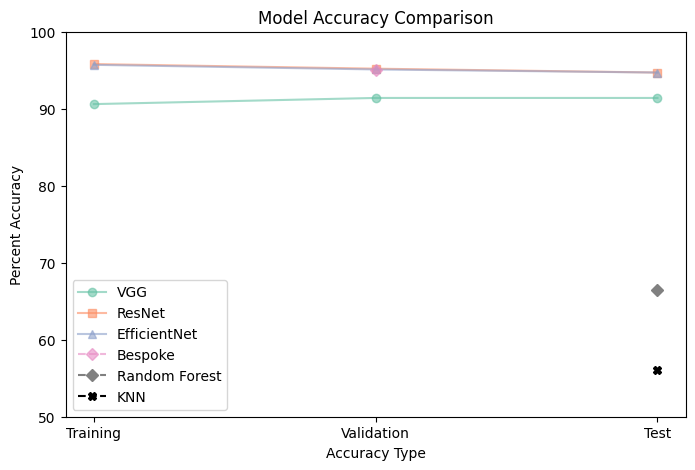

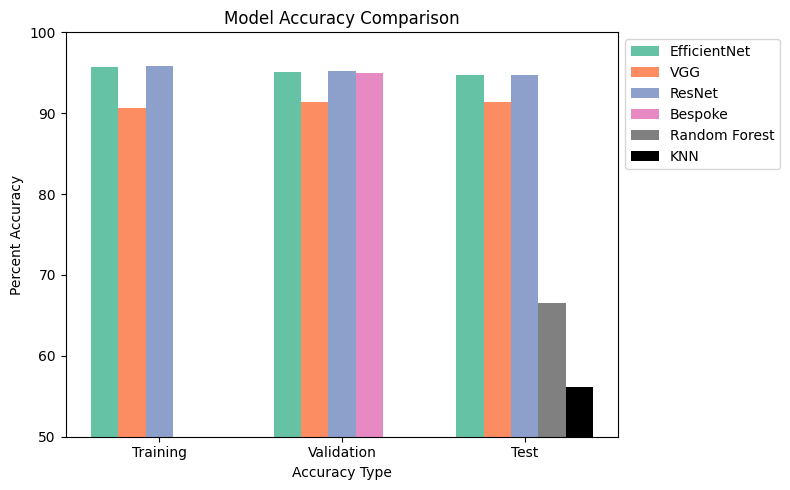

In [ ]:
import matplotlib.pyplot as plt

#manually input data
categories = ["Training", "Validation", "Test"]
vgg_acc = [90.6, 91.4, 91.4]
resnet_acc = [95.8, 95.2, 94.7]
efficientnet_acc = [95.7, 95.1, 94.7]
bespoke_acc = [None, 95, None] # Only Test Accuracy 
random_forest_acc = [None, None, 66.5] # Only test accuracy available
knn_acc = [None, None, 56.1]  # Only test accuracy available

# Replace None values with NaN for plotting (so they don't appear)
import numpy as np
bespoke_acc = [np.nan if v is None else v for v in bespoke_acc]
random_forest_acc = [np.nan if v is None else v for v in random_forest_acc]
knn_acc = [np.nan if v is None else v for v in knn_acc]

# Line Plot
#plt.style.use("seaborn-v0_8-colorblind")
plt.figure(figsize=(8, 5))
sns.set_palette("Set2")
plt.plot(categories, vgg_acc, marker="o", linestyle="-", label="VGG", alpha = 0.6)
plt.plot(categories, resnet_acc, marker="s", linestyle="-", label="ResNet", alpha = 0.6)
plt.plot(categories, efficientnet_acc, marker="^", linestyle="-", label="EfficientNet", alpha = 0.6)
plt.plot(categories, bespoke_acc, marker="D", linestyle="dashed", label="Bespoke", alpha = 0.6)
plt.plot(categories, random_forest_acc, marker="D", linestyle="dashed", label="Random Forest", color="gray")
plt.plot(categories, knn_acc, marker="X", linestyle="dashed", label="KNN", color="black")
plt.xlabel("Accuracy Type")
plt.ylabel("Percent Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.ylim(50, 100)
plt.show()

#Bar Plot
width = 0.15

plt.figure(figsize=(8, 5))
x = np.arange(len(categories))
plt.bar(x - 2 * width, efficientnet_acc, width, label="EfficientNet", alpha=1)
plt.bar(x - width, vgg_acc, width, label="VGG", alpha=1)
plt.bar(x, resnet_acc, width, label="ResNet", alpha=1)
plt.bar(x + width, bespoke_acc, width, label="Bespoke", alpha=1)
plt.bar(x + width, random_forest_acc, width, label="Random Forest", color="gray")
plt.bar(x + 2 * width, knn_acc, width, label="KNN", color="black")
plt.xlabel("Accuracy Type")
plt.ylabel("Percent Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(ticks=x, labels=categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.ylim(50, 100)
plt.show()
